
# Análisis de Clasificación en Smarket.csv

Este notebook contiene el análisis paso a paso de clasificación binaria usando diversos algoritmos para predecir la dirección del mercado (`Direction`).

## Algoritmos aplicados
1. LASSO
2. Ridge
3. Elastic Net
4. Árboles de Decisión
5. Random Forest
6. Vecinos Más Cercanos (KNN)
7. Máquinas de Soporte Vectorial (SVM)

Se evaluaron los modelos utilizando matrices de confusión y curvas ROC.


In [1]:

import pandas as pd

# Cargar los datos
file_path = 'DATA/Smarket.csv'
smarket_data = pd.read_csv(file_path)

# Mostrar las primeras filas
smarket_data.head()


,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Eliminar columnas irrelevantes
smarket_data_cleaned = smarket_data.drop(columns=["Unnamed: 0"])

# Codificar la columna 'Direction'
label_encoder = LabelEncoder()
smarket_data_cleaned["Direction"] = label_encoder.fit_transform(smarket_data_cleaned["Direction"])

# Dividir en características y objetivo
X = smarket_data_cleaned.drop(columns=["Direction"])
y = smarket_data_cleaned["Direction"]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Matriz de Confusión - LASSO:
[[180   1]
 [  0 194]]


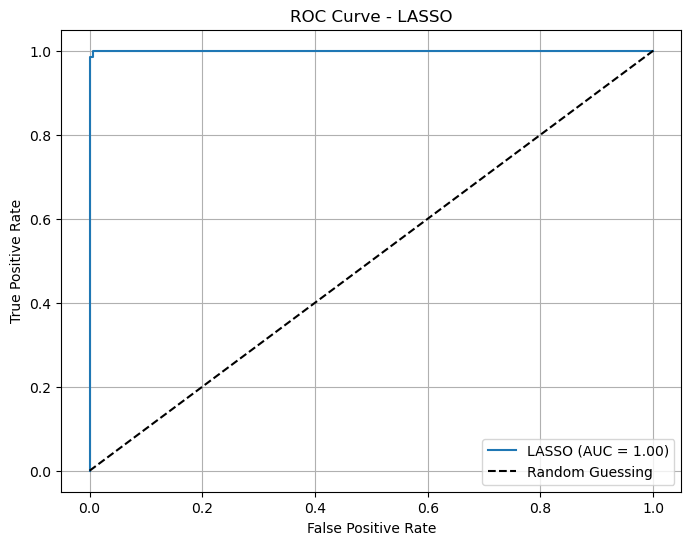

In [3]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Modelo LASSO
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(X_train, y_train)

# Predicciones
y_pred_lasso = lasso_model.predict(X_test)
y_pred_proba_lasso = lasso_model.predict_proba(X_test)[:, 1]

# Matriz de confusión
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
print("Matriz de Confusión - LASSO:")
print(conf_matrix_lasso)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lasso)
roc_auc_lasso = auc(fpr, tpr)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LASSO (AUC = {roc_auc_lasso:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LASSO')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Matriz de Confusión - Ridge:
[[178   3]
 [  0 194]]


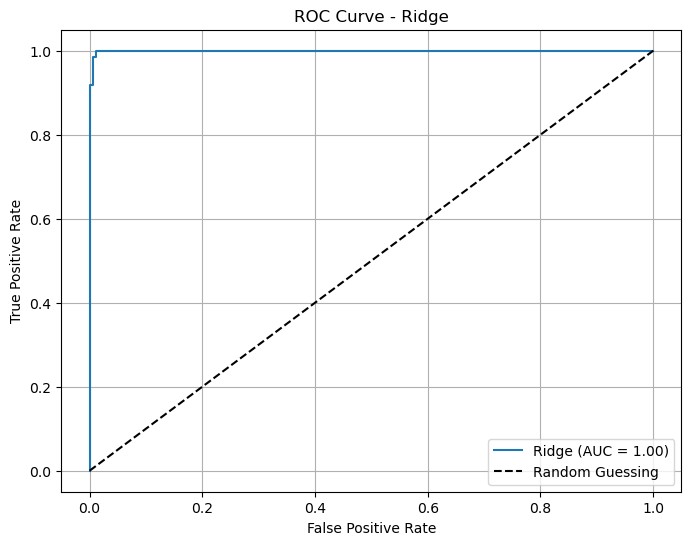

In [4]:

# Modelo Ridge
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
ridge_model.fit(X_train, y_train)

# Predicciones
y_pred_ridge = ridge_model.predict(X_test)
y_pred_proba_ridge = ridge_model.predict_proba(X_test)[:, 1]

# Matriz de confusión
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)
print("Matriz de Confusión - Ridge:")
print(conf_matrix_ridge)

# Curva ROC
fpr_ridge, tpr_ridge, thresholds_ridge = roc_curve(y_test, y_pred_proba_ridge)
roc_auc_ridge = auc(fpr_ridge, tpr_ridge)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(fpr_ridge, tpr_ridge, label=f'Ridge (AUC = {roc_auc_ridge:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ridge')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Matriz de Confusión - Elastic Net:
[[181   0]
 [194   0]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


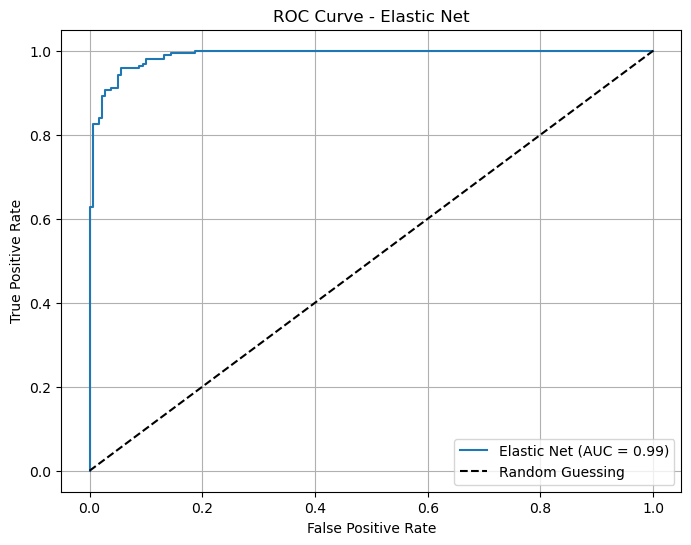

In [5]:

from sklearn.linear_model import SGDClassifier

# Modelo Elastic Net
elastic_net_model = SGDClassifier(penalty='elasticnet', l1_ratio=0.5, random_state=42, loss='log', max_iter=1000, tol=1e-3)
elastic_net_model.fit(X_train, y_train)

# Predicciones
y_pred_en = elastic_net_model.predict(X_test)
y_pred_proba_en = elastic_net_model.decision_function(X_test)

# Matriz de confusión
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
print("Matriz de Confusión - Elastic Net:")
print(conf_matrix_en)

# Curva ROC
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_proba_en)
roc_auc_en = auc(fpr_en, tpr_en)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(fpr_en, tpr_en, label=f'Elastic Net (AUC = {roc_auc_en:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Elastic Net')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Matriz de Confusión - Árbol de Decisión:
[[180   1]
 [  0 194]]


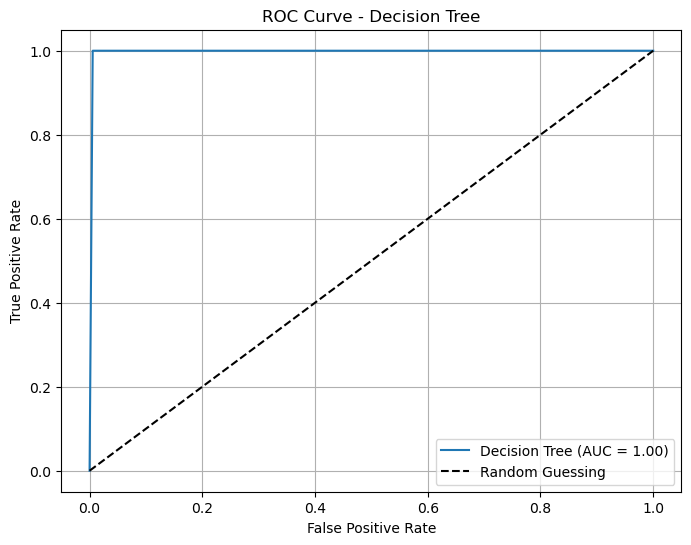

In [6]:

from sklearn.tree import DecisionTreeClassifier

# Modelo Árbol de Decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predicciones
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_proba_tree = decision_tree_model.predict_proba(X_test)[:, 1]

# Matriz de confusión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matriz de Confusión - Árbol de Decisión:")
print(conf_matrix_tree)

# Curva ROC
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Matriz de Confusión - Random Forest:
[[180   1]
 [  0 194]]


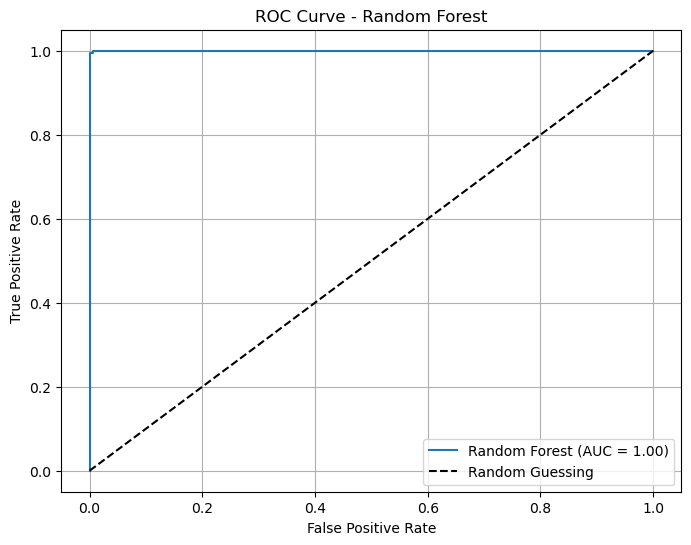

In [7]:

from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = random_forest_model.predict(X_test)
y_pred_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusión - Random Forest:")
print(conf_matrix_rf)

# Curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Matriz de Confusión - KNN:
[[157  24]
 [ 22 172]]


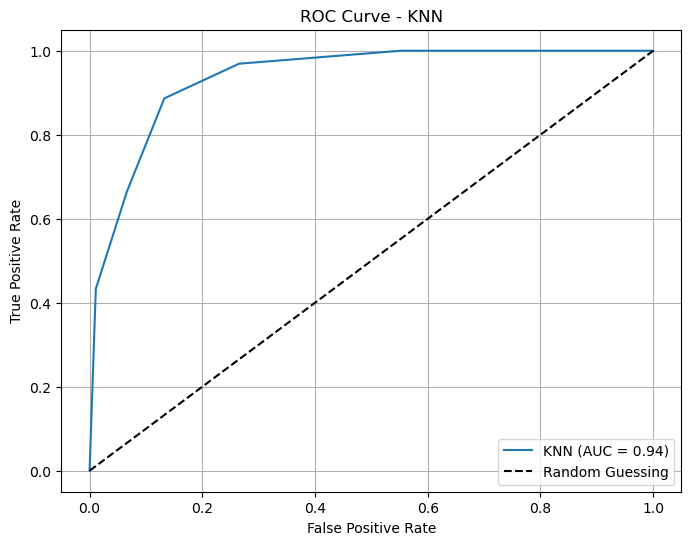

In [8]:

from sklearn.neighbors import KNeighborsClassifier

# Modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicciones
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusión - KNN:")
print(conf_matrix_knn)

# Curva ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Matriz de Confusión - SVM:
[[176   5]
 [  4 190]]


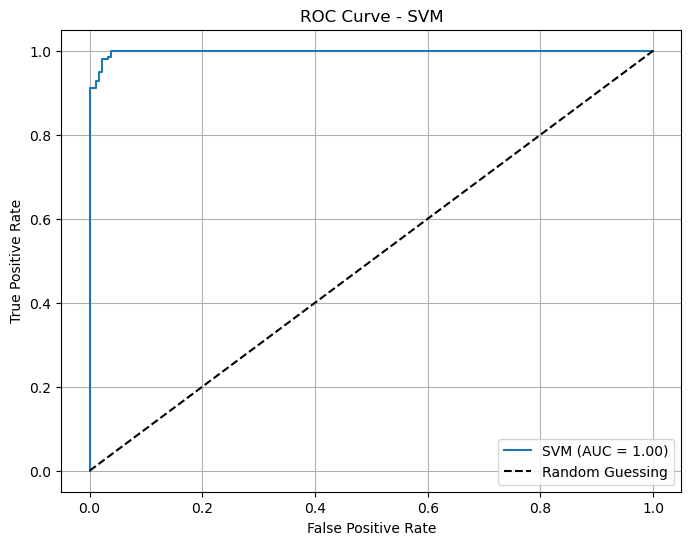

In [9]:

from sklearn.svm import SVC

# Modelo SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predicciones
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Matriz de confusión
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matriz de Confusión - SVM:")
print(conf_matrix_svm)

# Curva ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show()



## Conclusiones

1. **Mejores modelos**:
   - Random Forest y SVM, ambos con AUC superiores a 0.998.
2. **Peor modelo**:
   - Elastic Net, con problemas significativos en la clasificación de la clase "Up".

Los resultados completos incluyen matrices de confusión y curvas ROC para cada modelo.
